In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter
import glob 
from transformers import pipeline

# Order of the Coins 
- I pulled the top 10 market cap coins (that weren't stable coins) 
- In terms of market cap they are ordered as followed: 
    - bitcoin 
    - ethereum 
    - solana 
    - cardano 
    - ripple 
    - polkadot 
    - avalanche 
    - dogecoin 
    - shuba inu 
    - polygon 
    
   

In [2]:
result = glob.glob( 'Separate_Tweets/*.csv' )
#print(result)

keyword = ['bitcoin', '$btc', 'ethereum', '$eth', 'solana','$sol', 'cardano', '$ada', 'ripple', '$xrp', 
           'polkadot', '$dot', 'avalanche', '$avax', 'dogecoin', '$doge', 'shiba inu', '$shib', 'polygon', '$matic']


dfs = []

for i in range(len(keyword)-1): 
    
    df1 = pd.read_csv('Separate_Tweets/{}_Tweets.csv'.format(keyword[i]))
    df2 = pd.read_csv('Separate_Tweets/{}_Tweets.csv'.format(keyword[i+1]))
    
    frames = [df1,df2]
    df3 = pd.concat(frames)
    
    df3 = df3.drop_duplicates(subset = ['ID'])
    
    dfs.append(df3)
    
dfs = dfs[::2]

In [3]:
#hate how Im doing this but its not good practice to algorithmically name dataframes (according to the internet)

bitcoin_df = dfs[0]
ethereum_df = dfs[1]
solana_df = dfs[2]
cardano_df = dfs[3]
ripple_df = dfs[4]
polkadot_df = dfs[5]
avalanche_df = dfs[6]
dogecoin_df = dfs[7]
shiba_inu_df = dfs[8]
polygon_df = dfs[9]

In [4]:
frames = [bitcoin_df, ethereum_df, solana_df, cardano_df, ripple_df, polkadot_df, 
          avalanche_df, dogecoin_df, shiba_inu_df, polygon_df]


frames_txt = ['bitcoin_df', 'ethereum_df', 'solana_df', 'cardano_df', 'ripple_df', 'polkadot_df', 
          'avalanche_df', 'dogecoin_df', 'shiba_inu_df', 'polygon_df']

#create label category to keep track of tweets
for i in range(len(frames)):
    frames[i]['Label'] = frames_txt[i].split('_')[0]


crypto_tweets = pd.concat(frames)
crypto_tweets = crypto_tweets.drop_duplicates(subset = ['ID'])
crypto_tweets.to_csv('Crypto_Tweets_v2.csv', index = False)

In [5]:
#crypto_tweets

In [6]:
sum_vals = 0

for i in range(len(frames)):
    sum_vals += frames[i].shape[0]

for i in range(len(frames)):
    print(' number of tweets for {}:'.format(frames_txt[i]), frames[i].shape[0]/sum_vals)

 number of tweets for bitcoin_df: 0.14065491183879092
 number of tweets for ethereum_df: 0.20398704569989204
 number of tweets for solana_df: 0.30845627923713564
 number of tweets for cardano_df: 0.05478229578985246
 number of tweets for ripple_df: 0.046462756387189635
 number of tweets for polkadot_df: 0.00699532205829435
 number of tweets for avalanche_df: 0.03516372795969773
 number of tweets for dogecoin_df: 0.042562072688017275
 number of tweets for shiba_inu_df: 0.12122346167686218
 number of tweets for polygon_df: 0.039712126664267725


In [7]:
#Load data, remove NAs
df = pd.read_csv('Crypto_Tweets_v2.csv')


for i in ['Followers', 'Favorites', 'Tweet', 'ID']:
    df = df[df[i].notna()]
            
df

,Date,ID,Tweet,Username,Location,Favorites,Retweets,Followers,Label
0,2022-01-03 23:47:07+00:00,1478150966025371649,"13 years after the birth of genesis block, El ...",MilenaMayorga,"Washington, DC /San Salvador",2904.0,292,358194.0,bitcoin
1,2022-01-03 23:30:03+00:00,1478146672228282368,I talked to 5 billionaires last week.\n\nEvery...,stedas,NaN,775.0,122,102103.0,bitcoin
2,2022-01-03 23:20:34+00:00,1478144283886559235,"Why I believe #Bitcoin can save #Millennials, ...",natbrunell,No Financial Advice,556.0,114,245853.0,bitcoin
3,2022-01-03 23:15:43+00:00,1478143064829042688,"Since leaving the WH, the Princeton undergrad ...",JoJoFromJerz,"New Jersey, USA",906.0,174,530451.0,bitcoin
4,2022-01-03 23:02:57+00:00,1478139850029215745,"@MollyJongFast @atrupar Since leaving the WH, ...",JoJoFromJerz,"New Jersey, USA",772.0,79,530451.0,bitcoin
...,...,...,...,...,...,...,...,...,...
64538,2022-05-09 01:17:48+00:00,1523472267857907714,🎉Celebrating the #YMZClub X #Florafam collab \...,NeuroPandas,NaN,119.0,102,1437.0,polygon
64539,2022-05-10 09:19:20+00:00,1523955838855098368,Current top 10 coins by AltRank™\n\n1️⃣ $egld\...,LunarCrush,Moon,575.0,196,279547.0,polygon
64540,2022-05-26 14:58:25+00:00,1529839376561324035,🎉 BIG #NFTGiveaway 🎉\n\n5x @FishGsNFT NFTs! 😲\...,CryptoKevvvv,Metaverse,143.0,121,8711.0,polygon
64541,2022-05-28 07:32:39+00:00,1530451971949268992,🚨 20 $MATIC GIVEAWAY 🚨\n\nTo participate:\n1. ...,ViciousChief,The Moon,524.0,485,19829.0,polygon


In [8]:
#drop duplicate product listings 
df1 = df.drop_duplicates(subset = ['ID'])
#values dropped from each class
print("the number of values dropped from each class:", df.shape[0]-df1.shape[0])
print("number of unique tweets:", df1.shape[0])

# missing values 
print("the proportion of missing values by column:", df1.isnull().sum() * 100 / df.shape[0])

the number of values dropped from each class: 0
number of unique tweets: 64513
the proportion of missing values by column: Date          0.000000
ID            0.000000
Tweet         0.000000
Username      0.000000
Location     30.986003
Favorites     0.000000
Retweets      0.000000
Followers     0.000000
Label         0.000000
dtype: float64


In [9]:

print("number of unique twitter accounts:", len(np.unique(df1['Username'])))


act_freq = df1.groupby(['Username'])['Username', 'Followers'].agg(['count','mean'])
act_freq = act_freq.sort_values(by = [('Followers', 'count')], ascending = False)


number of unique twitter accounts: 12233


<ipython-input-9-5e84a9ffbc63>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  act_freq = df1.groupby(['Username'])['Username', 'Followers'].agg(['count','mean'])


In [10]:
df1['Retweets'] = pd.to_numeric(df1['Retweets'])
df1.dtypes

Date          object
ID            object
Tweet         object
Username      object
Location      object
Favorites    float64
Retweets       int64
Followers    float64
Label         object
dtype: object

In [11]:
act_freq

Followers              
                    count          mean
Username                               
ShibInform           1234  5.873748e+05
shibainuart           898  3.367217e+05
WatcherGuru           864  1.277635e+06
shibburn              519  2.683340e+05
DecNFT                494  1.018961e+05
...                   ...           ...
Palaneum1               1  2.377900e+04
PakoiNft                1  2.130000e+02
PakitaNFT               1  1.858500e+04
PaintingBitcoin         1  9.090000e+02
zzigster                1  2.600000e+01

[12233 rows x 2 columns]

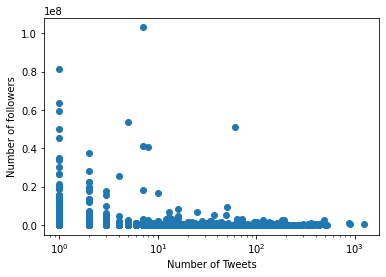

In [12]:
plt.scatter(np.array(act_freq.iloc[:,0]), np.array(act_freq.iloc[:,1]))
plt.xscale('log')

#plt.yscale('log')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of followers')
plt.show("Followers plotted versus bymber of tweets")

In [13]:
#get separate datetime columns 
df1['Dates'] = pd.to_datetime(df1['Date']).dt.date
df1['Time'] = pd.to_datetime(df1['Date']).dt.time

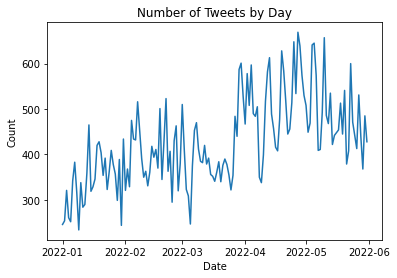

In [14]:
#time series plot (this does not necessarily indicate accurate tweet volume, disparate results in the scraper)
plt.plot(df1.groupby(['Dates'])['Dates'].agg(Frequency = 'count'))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Tweets by Day')
plt.show()

In [15]:
#create a function that defines the percentiles of favorites, retweets by the day
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [16]:
#get the statistics on many 
value_df = df1.groupby(['Dates'])['Favorites','Retweets'].agg(['mean', percentile(25), 'median', percentile(75), 'std'])

<ipython-input-16-8ce8e3a15b40>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  value_df = df1.groupby(['Dates'])['Favorites','Retweets'].agg(['mean', percentile(25), 'median', percentile(75), 'std'])


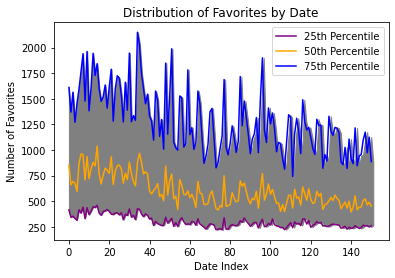

In [17]:
#plot favorites 

x  = np.linspace(0,151,151)
y1 = np.array(value_df.iloc[:,1])
y2 = np.array(value_df.iloc[:,2])
y3 = np.array(value_df.iloc[:,3])
plt.plot(y1, color = 'purple', label = '25th Percentile')
plt.plot(y2, color = 'orange',  label = '50th Percentile')
plt.plot(y3, color = 'blue',label = '75th Percentile')
plt.fill_between(x, y1, y3, color = 'grey')
#plt.xticks(x, labels=np.unique(df1['Dates']), rotation = 90)
plt.legend()
plt.title('Distribution of Favorites by Date')
plt.ylabel('Number of Favorites')
plt.xlabel('Date Index')
plt.show()

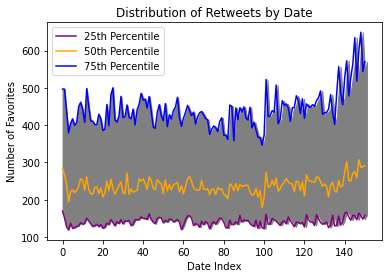

In [18]:
#plot retweets 

x  = np.linspace(0,151,151)
y1 = np.array(value_df.iloc[:,6])
y2 = np.array(value_df.iloc[:,7])
y3 = np.array(value_df.iloc[:,8])
plt.plot(y1, color = 'purple', label = '25th Percentile')
plt.plot(y2, color = 'orange',  label = '50th Percentile')
plt.plot(y3, color = 'blue',label = '75th Percentile')
plt.fill_between(x, y1, y3, color = 'grey')
#plt.xticks(x, labels=np.unique(df1['Dates']), rotation = 90)
plt.legend()
plt.title('Distribution of Retweets by Date')
plt.ylabel('Number of Favorites')
plt.xlabel('Date Index')
plt.show()


# Using Hugging Face to Classify Tweet Sentiment 

In [19]:
data = df1.loc[:,'Tweet']

In [20]:
import re 
import nltk 

#lemmatize
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()


nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

#stopwords set 
stp = set(stopwords.words('english'))


#tokenize words
from nltk.tokenize import RegexpTokenizer

# ##remove text
# def preprocess_text(corpus):
    
#     #basic text cleaning
#     corpus = str(corpus) #convert all values to string 
#     corpus = corpus.lower() #set text to lowercase 
    
#     #remove specific values from text 
#     remove_sym = re.compile('[^0-9a-z #+_]') #compiling symbols that are numeric/special to remove from text 
#     corpus = remove_sym.sub('', corpus)
    
#     #add spaces
#     space = re.compile('[/(){}\[\]\\@;]')
#     corpus = space.sub(' ', corpus)
    
#     #tokenize
#     tk = RegexpTokenizer(r'\w+')
#     corpus = tk.tokenize(corpus)
    
#     #remove stop words
#     corpus = [i for i in corpus if not i in stp]
    
#     #lemmatize text 
#     lemm_text = [lemma.lemmatize(i) for i in corpus]
#     corpus = " ".join(lemm_text)

#     return corpus


[nltk_data] Downloading package wordnet to /Users/cho/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/cho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def preprocess_text(corpus): 
    corpus = corpus.lower()
    corpus = re.sub(r'http\S+', '', corpus)
    corpus = corpus.replace("\n", "")
    
    return corpus

In [22]:
#data cleaned by doc and then appended to a list 
data_cleaned = []

for i in data: 
    data_cleaned.append(preprocess_text(i))

In [23]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
from transformers import logging
logging.set_verbosity_error()

import time 

start = time.time()

def sentiment_func(text): 
    
    MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
    tokenizer = AutoTokenizer.from_pretrained(MODEL)
    config = AutoConfig.from_pretrained(MODEL)

    model = AutoModelForSequenceClassification.from_pretrained(MODEL)

    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    
    return scores




In [24]:
sent_scores = []


start = time.time()
for i in data_cleaned:
    
    values = sentiment_func(i)
    sent_scores.append(values)
    
end = time.time()
print("total runtime:", end-start)

KeyboardInterrupt: 

In [ ]:
#0 -> Negative; 1 -> Neutral; 2 -> Positive

names = ['Negative', 'Neutral', 'Positive']

#create data frame
sent_df = pd.DataFrame(np.concatenate(sent_scores), 
                       columns = names)

#get predominate sentiment in a new column
sent_df['Tweet Sentiment'] = names[np.argmax(sent_df, axis = 0)]


#completed with sentiment 
complete_df = pd.concat([df1, sent_df], axis = 1)
complete_df.head()
    
    

In [ ]:
# # Classify Tweets by the Types of Content they Have 
# import time 

# start = time.time()

# sentiment = pipeline("sentiment-analysis")
# data = list(df1.loc[:,'Tweet'])
# sentiment_values = sentiment(data_cleaned)

# end = time.time()
# print("total runtime:", end-start)

In [ ]:
# #Clean the Text Data to remove non-readable characters
# from transformers import AutoTokenizer

# tokens = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# #cleaning function 

# def tokenize_func(vals):
#     return tokens(vals['text'], truncation = True)



In [ ]:
#analysis
# sentiment_values
# sentiment_values = list(sentiment_values)

In [ ]:
# df1.drop(['Sentiment'], axis = 1)

In [ ]:
# import re

# sent_list = []
# values_list = []

# for i in sentiment_values:
#     i = str(i)
    
#     #split to get values
#     label = i.split(',')[0]
#     score = i.split(',')[1]
    
#     #split again to specific things we need 
#     sent = label.split(':')[1]
#     values = score.split(':')[1]
    
#     #get sentiment we need
#     sent = re.search("'(.*)'", sent)
#     sent = sent.group(1).strip()
    
#     sent_list.append(sent)
    
    
#     non_decimal = re.compile(r'[^\d.]+')
#     values = non_decimal.sub('',values)
#     values = float(values)
    
#     values_list.append(values)
    
# values_list

